# 2기 VOD 데이터 EDA

<hr>

## 00. 기본 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 출력 X
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 주피터 노트북에서 그래프가 보이는 설정
%matplotlib notebook

In [3]:
# 한글 font 설정
import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [4]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<hr>

## 01. 데이터 불러오기

In [124]:
vod_2 = pd.read_csv('data/DX데이터스쿨_VOD_2기/VOD시청_2월.csv')
vod_3 = pd.read_csv('data/DX데이터스쿨_VOD_2기/VOD시청_3월.csv')
vod_4 = pd.read_csv('data/DX데이터스쿨_VOD_2기/VOD시청_4월.csv')

In [125]:
print("2월 VOD shape:", vod_2.shape)  # (99753, 9)
print("3월 VOD shape:", vod_3.shape)  # (94737, 9)
print("4월 VOD shape:", vod_4.shape)  # (78905, 9)

2월 VOD shape: (99753, 9)
3월 VOD shape: (94737, 9)
4월 VOD shape: (78905, 9)


In [126]:
# column명 확인
vod_2.columns

Index(['subsr', 'asset_nm', 'ct_cl', 'genre_of_ct_cl', 'use_tms', 'SMRY',
       'ACTR_DISP', 'disp_rtm', 'strt_dt'],
      dtype='object')

In [127]:
# 자료형 확인
vod_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99753 entries, 0 to 99752
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subsr           99753 non-null  int64 
 1   asset_nm        99753 non-null  object
 2   ct_cl           99753 non-null  object
 3   genre_of_ct_cl  99753 non-null  object
 4   use_tms         99753 non-null  int64 
 5   SMRY            99717 non-null  object
 6   ACTR_DISP       99717 non-null  object
 7   disp_rtm        99753 non-null  object
 8   strt_dt         99753 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 6.8+ MB


In [128]:
vod_2.head(3)

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
0,65953720,(SD)자이언트 39회,TV드라마,기타,0,정연 주위를 맴도는 부철에 대한 인상이 좋지 않은 강모는 시덕에게 부철의 뒷조사를 ...,"이범수,박진희,주상욱,박상민",01:05,20240210224100
1,62719160,전원일기 0900회,TV드라마,기타,1487,아우를 위하여. 양촌리에 낯선 임신한 여자가 나타나 아이들에게 금동이 사는 곳을 물...,"최불암,김혜자,김용건,김수미,고두심,유인촌,정대홍",00:52,20240208003745
2,62048350,내손을잡아 088회,TV드라마,기타,17,연수는 신희와 금자 사이에 끼어 든다. 고민하던 금자는 신희에게 마음대로 하라고 소...,"박시은,이재황,진태현,배그린",00:33,20240218230121


In [129]:
vod_2['subsr'].nunique()

4612

<hr>

## 02. '성인' 장르 삭제

In [130]:
print("'성인' 장르 삭제 전 shape:", vod_2.shape)
print("'성인' 장르 vod의 shape: ", vod_2[vod_2['genre_of_ct_cl'] == '성인'].shape)

filtered_adult = vod_2[vod_2['genre_of_ct_cl'] != '성인']

print("'성인' 장르 삭제 후 shape:", filtered_adult.shape)

'성인' 장르 삭제 전 shape: (99753, 9)
'성인' 장르 vod의 shape:  (4972, 9)
'성인' 장르 삭제 후 shape: (94781, 9)


<hr>

## 03. 예고/커밍순 시청기록 삭제

In [131]:
# asset_nm에 '커밍순'이 있는 행의 수 
filtered_adult[filtered_adult['asset_nm'].str.contains('커밍순', na=False)].shape[0]

18

In [132]:
# asset_nm에 '(예고'가 있는 행의 수 
filtered_adult[filtered_adult['asset_nm'].str.contains('\(예고', na=False)].shape[0]

1423

In [133]:
# asset_nm에 '예고'가 있는 행의 수 
filtered_adult[filtered_adult['asset_nm'].str.contains('예고', na=False)].shape[0]

1437

In [134]:
# '(예고'와 '예고'의 차집합 데이터 확인
condition_1 = filtered_adult[filtered_adult['asset_nm'].str.contains(r'\(예고', na=False)]
condition_2 = filtered_adult[filtered_adult['asset_nm'].str.contains('예고', na=False)]

condition_2[~condition_2.index.isin(condition_1.index)]

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
15024,65344510,더웹툰-예고살인,영화,공포/스릴러,615,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240212170546
21627,65034830,더웹툰-예고살인,영화,공포/스릴러,5382,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240226194451
31519,65034830,더웹툰-예고살인,영화,공포/스릴러,2364,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240209135729
32026,66969980,더웹툰-예고살인,영화,공포/스릴러,6240,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240214011446
33044,64120770,더웹툰-예고살인,영화,공포/스릴러,4547,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240209213637
40401,66020850,더웹툰-예고살인,영화,공포/스릴러,1263,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240210123826
40402,66058860,더웹툰-예고살인,영화,공포/스릴러,6240,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240211152018
42471,60256000,더웹툰-예고살인,영화,공포/스릴러,6240,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240225083250
48384,65034830,더웹툰-예고살인,영화,공포/스릴러,6240,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240209162412
48385,65034830,더웹툰-예고살인,영화,공포/스릴러,6240,대한민국 최초 웹툰을 소재로 한 감각적공포의 탄생. 호러퀸 이시영 그리고 엄기준의 ...,"이시영,엄기준,현우,문가영",01:44,20240211154355


##### '예고'라는 단어가 포함된 VOD 컨텐츠 중 제목에 '예고'가 들어가는 데이터가 있으므로 '커밍순'과 괄호 포함 '(예고'를 포함하는 데이터 행만 삭제

In [135]:
contains_1 = filtered_adult[filtered_adult['asset_nm'].str.contains('\(예고', na=False)]
contains_2 = filtered_adult[filtered_adult['asset_nm'].str.contains('커밍순', na=False)]
# 두 조건의 index를 결합
remove_indices = contains_1.index.union(contains_2.index)

print("커밍순/예고편 삭제 전 shape:", filtered_adult.shape)

# 해당 index를 제외한 데이터프레임 생성
filtered_preview = filtered_adult[~filtered_adult.index.isin(remove_indices)]

print("커밍순/예고편 삭제 후 shape:", filtered_preview.shape)

커밍순/예고편 삭제 전 shape: (94781, 9)
커밍순/예고편 삭제 후 shape: (93340, 9)


<hr>

## 04. 'subsr' 칼럼 확인 (사용자 당 VOD 시청 횟수)

In [136]:
# subsr
subsr_value_counts = filtered_preview['subsr'].value_counts()
subsr_value_counts

65953720    9787
64807120    1005
62719160     959
66606750     883
59891020     854
            ... 
62611080       1
66355730       1
64946280       1
63736750       1
63395570       1
Name: subsr, Length: 4417, dtype: int64

In [137]:
# VOD를 가장 많이 시청한 사용자: 65953720 => 9787번
# VOD를 두 번째로 많이 시청한 사용자: 64807120 => 1005번

In [138]:
# VOD를 한 번만 시청한 사용자
unique_count = (subsr_value_counts == 1).sum()
unique_count

929

In [139]:
# VOD를 5번 이하로 시청한 사용자
unique_count = (subsr_value_counts <= 5).sum()
unique_count

2367

In [140]:
subsr_value_counts.describe()

count    4417.00000
mean       21.13199
std       157.94811
min         1.00000
25%         2.00000
50%         5.00000
75%        13.00000
max      9787.00000
Name: subsr, dtype: float64

In [141]:
# 데이터프레임으로 변환
counts_df = subsr_value_counts.reset_index()
counts_df.columns = ['subsr', 'count']
counts_df.head(3)

,subsr,count
0,65953720,9787
1,64807120,1005
2,62719160,959


In [142]:
# count의 값이 가장 큰 행 삭제
top_indices = counts_df.nlargest(1, 'count').index
counts_max_remvd = counts_df[~counts_df.index.isin(top_indices)]
counts_max_remvd.head(3)

,subsr,count
1,64807120,1005
2,62719160,959
3,66606750,883


In [143]:
counts_max_remvd.shape

(4416, 2)

<IPython.core.display.Javascript object>


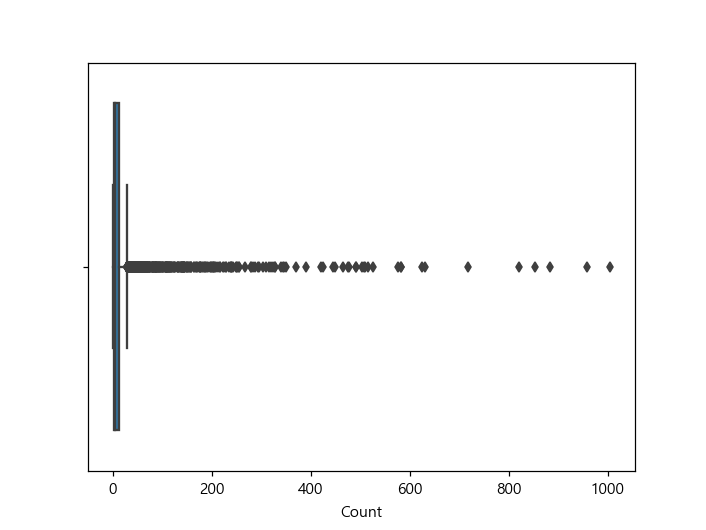

In [144]:
# 박스그래프
sns.boxplot(data=counts_max_remvd, x='count', orient='h')
plt.xlabel('Count')
plt.show()

In [145]:
plt.close('all')

<IPython.core.display.Javascript object>


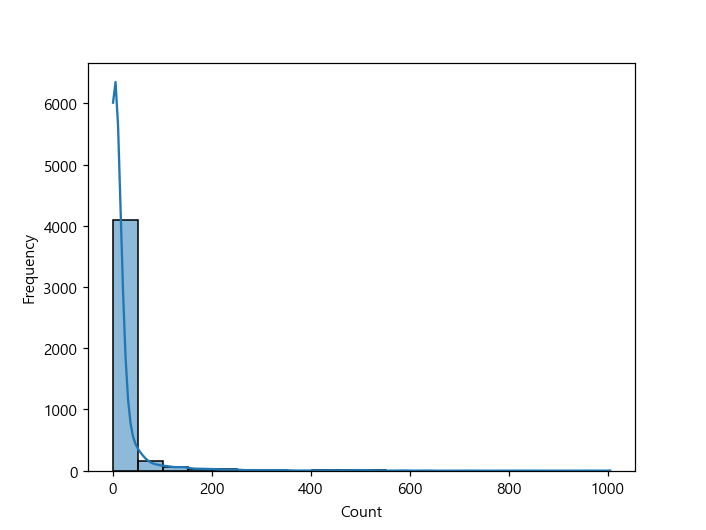

In [146]:
sns.histplot(counts_max_remvd['count'], bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [147]:
plt.close('all')

In [148]:
counts_max_remvd.describe()

# count    4417.00000
# mean       21.13199
# std       157.94811
# min         1.00000
# 25%         2.00000
# 50%         5.00000
# 75%        13.00000
# max      9787.00000

,subsr,count
count,4.416000e+03,4416.000000
mean,6.413661e+07,18.920516
std,2.229929e+06,57.849046
min,5.987534e+07,1.000000
25%,6.202693e+07,2.000000
50%,6.468956e+07,5.000000
75%,6.607974e+07,13.000000
max,6.736408e+07,1005.000000


In [149]:
# VOD를 200번 이상 시청한 사용자
(subsr_value_counts >= 200).sum()

71

<hr>

## 05. VOD를 200번 이상 시청한 사용자 제거

In [150]:
# count의 값이 가장 큰 행 삭제
threshold = 200
counts_200_remvd = counts_max_remvd[counts_max_remvd['count'] <= threshold]
counts_200_remvd.head(3)

,subsr,count
71,64514310,199
72,64120910,199
73,65810150,197


<IPython.core.display.Javascript object>


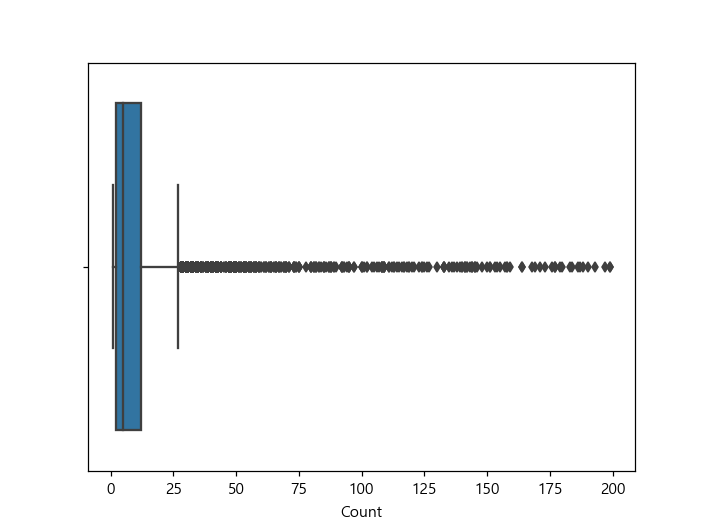

In [151]:
# 다시 시각화
sns.boxplot(data=counts_200_remvd, x='count', orient='h')
plt.xlabel('Count')
plt.show()

In [152]:
plt.close('all')

<IPython.core.display.Javascript object>


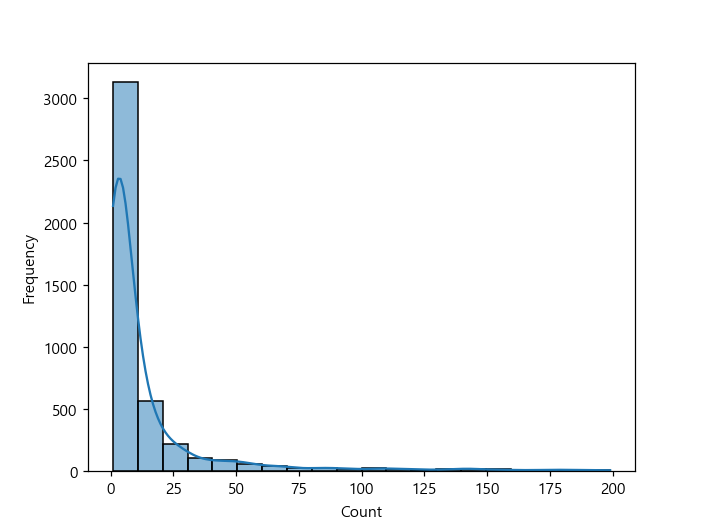

Text(0, 0.5, 'Frequency')

In [153]:
sns.histplot(counts_200_remvd['count'], bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')

In [154]:
plt.close('all')

In [155]:
counts_200_remvd.describe()

,subsr,count
count,4.346000e+03,4346.000000
mean,6.414517e+07,13.016107
std,2.230723e+06,24.573372
min,5.987534e+07,1.000000
25%,6.203628e+07,2.000000
50%,6.470226e+07,5.000000
75%,6.608914e+07,12.000000
max,6.736408e+07,199.000000


<hr>

## 06. 이상치라 생각되는 것 일단 제거

In [156]:
Q1 = 2
Q3 = 12
IQR = Q3 - Q1

# 이상치 범위 계산
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [157]:
remv_outlier = counts_200_remvd[
    (counts_200_remvd['count'] >= lower) & (counts_200_remvd['count'] <= upper)
]

<IPython.core.display.Javascript object>


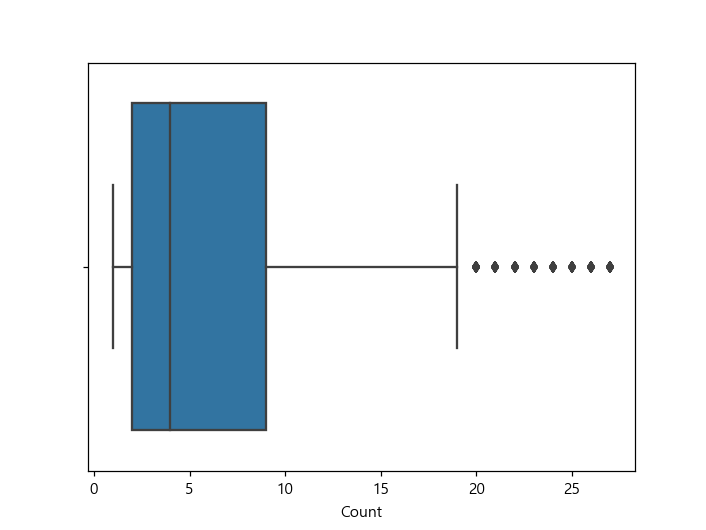

In [158]:
# 다시 시각화
sns.boxplot(data=remv_outlier, x='count', orient='h')
plt.xlabel('Count')
plt.show()

In [159]:
plt.close('all')

<IPython.core.display.Javascript object>


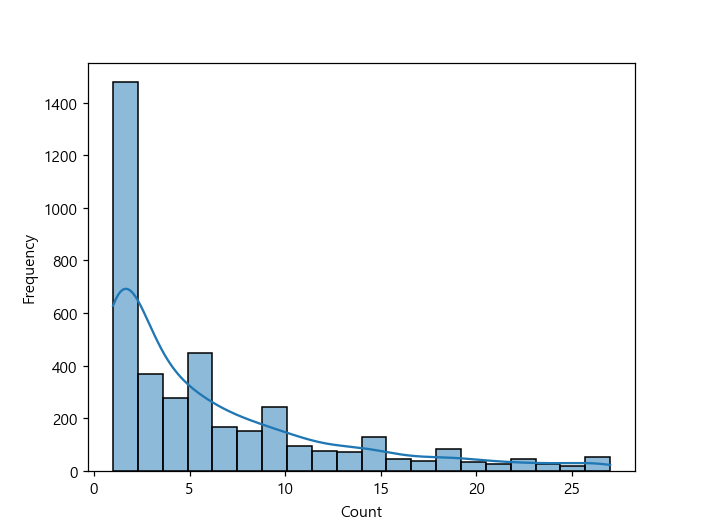

Text(0, 0.5, 'Frequency')

In [160]:
sns.histplot(remv_outlier['count'], bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')

In [161]:
plt.close('all')

In [162]:
remv_outlier.shape

(3860, 2)

In [163]:
remv_outlier

,subsr,count
557,60206440,27
558,66850840,27
559,62340810,27
560,63845880,27
561,67145470,27
...,...,...
4412,62611080,1
4413,66355730,1
4414,64946280,1
4415,63736750,1


##### 이상치 제거 한 사용자의 수 >> 3860개

<hr>

## 07. 이상치가 아닌 사용자의 데이터 필터링

In [164]:
# remv_outlier에 있는 filtered_preview의 subsr만 저장
filtered_outlier = filtered_preview[filtered_preview['subsr'].isin(remv_outlier['subsr'])]
print(filtered_outlier.shape)
filtered_outlier.head(3)

(23533, 9)


,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
3,60660810,(FREE)귀공자(무료),영화,액션/어드벤쳐,17,서비스 해지 시까지 시청 가능. 필리핀에서 불법 경기장을 전전하며 병든 어머니와 살...,"김선호,강태주,김강우,고아라",01:58,20240202111906
4,65730770,(FREE)귀공자(무료),영화,액션/어드벤쳐,3,서비스 해지 시까지 시청 가능. 필리핀에서 불법 경기장을 전전하며 병든 어머니와 살...,"김선호,강태주,김강우,고아라",01:58,20240203150848
5,62733160,(FREE)귀공자(무료),영화,액션/어드벤쳐,17,서비스 해지 시까지 시청 가능. 필리핀에서 불법 경기장을 전전하며 병든 어머니와 살...,"김선호,강태주,김강우,고아라",01:58,20240217235237


##### 여기까지 이상치를 제거한 사용자만 남은 데이터프레임 

<hr>

## 08.  strt_dt 칼럼 나누기  & 러닝타임 초 단위로 변환 & (지금) 필요 없는 칼럼 삭제

In [165]:
# 'strt_dt'를 문자열로 처리
filtered_outlier['strt_dt'] = filtered_outlier['strt_dt'].astype(str)

# 월, 일, 시, 분, 초 열 생성
filtered_outlier['month'] = filtered_outlier['strt_dt'].str[4:6]     # 월 추출 (5번째~6번째 문자)
filtered_outlier['day'] = filtered_outlier['strt_dt'].str[6:8]       # 일 추출 (7번째~8번째 문자)
filtered_outlier['hour'] = filtered_outlier['strt_dt'].str[8:10]     # 시 추출 (9번째~10번째 문자)
filtered_outlier['minute'] = filtered_outlier['strt_dt'].str[10:12]  # 분 추출 (11번째~12번째 문자)
filtered_outlier['second'] = filtered_outlier['strt_dt'].str[12:14]  # 초 추출 (13번째~14번째 문자)

filtered_outlier.head(1)

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,month,day,hour,minute,second
3,60660810,(FREE)귀공자(무료),영화,액션/어드벤쳐,17,서비스 해지 시까지 시청 가능. 필리핀에서 불법 경기장을 전전하며 병든 어머니와 살...,"김선호,강태주,김강우,고아라",01:58,20240202111906,02,02,11,19,06


In [166]:
filtered_outlier['rtm_seconds'] = filtered_outlier['disp_rtm'].str.split(':').apply(lambda x: (int(x[0]) * 60 + int(x[1])) * 60)
filtered_outlier[['disp_rtm', 'rtm_seconds']].head(3)

,disp_rtm,rtm_seconds
3,01:58,7080
4,01:58,7080
5,01:58,7080


In [167]:
# 러닝타임보다 큰 use_tms가 있는지 확인
filtered_outlier[filtered_outlier['use_tms'] > filtered_outlier['rtm_seconds']]

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,month,day,hour,minute,second,rtm_seconds


##### 러닝타임보다 큰 값을 가지는 시청 시간은 없음

In [168]:
# 필요없는 칼럼 drop
cols_to_drop = ['ACTR_DISP', 'disp_rtm', 'strt_dt']
filtered_df = filtered_outlier.drop(columns=cols_to_drop)

print(filtered_df.shape)
filtered_df.head(3)

(23533, 12)


,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,month,day,hour,minute,second,rtm_seconds
3,60660810,(FREE)귀공자(무료),영화,액션/어드벤쳐,17,서비스 해지 시까지 시청 가능. 필리핀에서 불법 경기장을 전전하며 병든 어머니와 살...,02,02,11,19,06,7080
4,65730770,(FREE)귀공자(무료),영화,액션/어드벤쳐,3,서비스 해지 시까지 시청 가능. 필리핀에서 불법 경기장을 전전하며 병든 어머니와 살...,02,03,15,08,48,7080
5,62733160,(FREE)귀공자(무료),영화,액션/어드벤쳐,17,서비스 해지 시까지 시청 가능. 필리핀에서 불법 경기장을 전전하며 병든 어머니와 살...,02,17,23,52,37,7080


<hr>

## 09. 시청 시간이 3분 또는 3분 이하인 것은 미리보기로 생각하고 제거

In [169]:
# 180초 이하의 시청시간
filtered_df[filtered_df['use_tms'] <= 180].shape

(7460, 12)

In [170]:
# 180 이하인 행 삭제
filtered_180 = filtered_df[filtered_df['use_tms'] > 180]
filtered_180.shape

(16073, 12)

In [171]:
filtered_180['use_tms'].describe()

count    16073.000000
mean      2397.002738
std       2172.669535
min        181.000000
25%        600.000000
50%       1601.000000
75%       3812.000000
max      13925.000000
Name: use_tms, dtype: float64

In [172]:
filtered_180['use_tms'].value_counts()

5580    167
2700    128
5520    121
660     114
3900    111
       ... 
6313      1
5641      1
3667      1
2359      1
5017      1
Name: use_tms, Length: 4607, dtype: int64

<IPython.core.display.Javascript object>


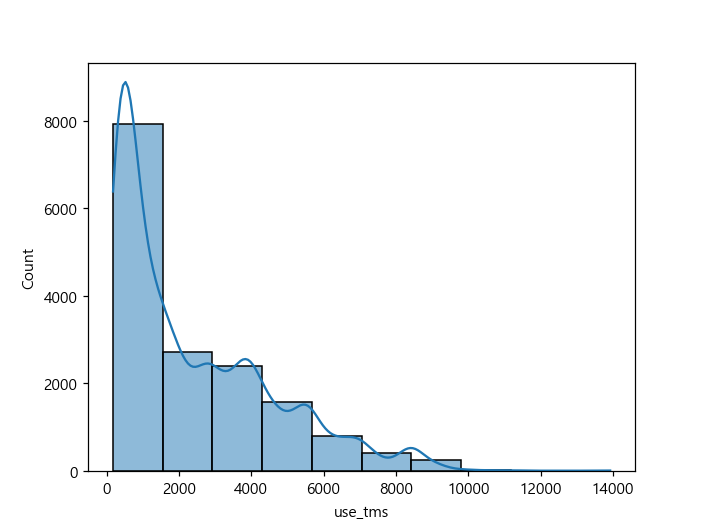

<AxesSubplot: xlabel='use_tms', ylabel='Count'>

In [173]:
sns.histplot(data=filtered_180, x='use_tms', kde=True, bins=10, edgecolor='black')

In [174]:
plt.close('all')

<IPython.core.display.Javascript object>


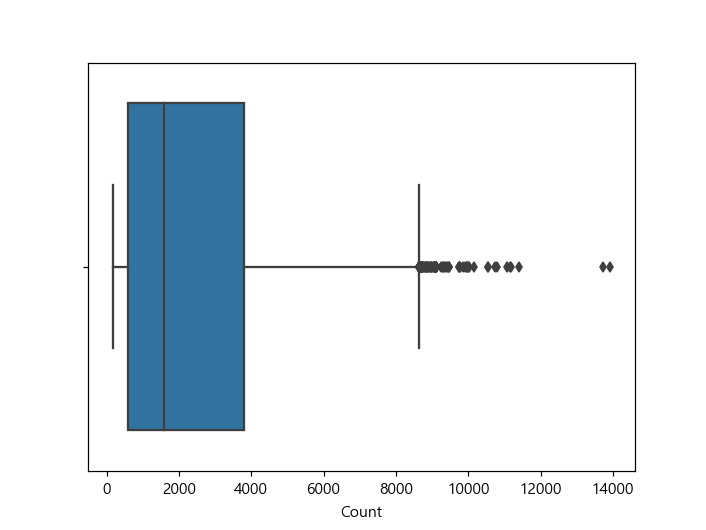

In [175]:
# 다시 시각화
sns.boxplot(data=filtered_180, x='use_tms', orient='h')
plt.xlabel('Count')
plt.show()

In [176]:
plt.close('all')

## 10. n% 이상 시청한 사용자의 비율

In [177]:
# 80% 이상 시청한 사용자 필터링
watched_80 = filtered_180[filtered_180['use_tms'] >= filtered_180['rtm_seconds'] * 0.8]

# 콘텐츠 수 출력
watched_80.shape[0]

5900

<hr>

## 11. '영화' 데이터프레임 생성

In [178]:
watched_80.head()

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,month,day,hour,minute,second,rtm_seconds
28,62401010,열녀박씨 계약결혼뎐 08회(23/12/16),TV드라마,기타,3958,서로의 마음을 확인한 연우(이세영)와 태하(배인혁)는 제주도 여행에서 행복한 시간을...,02,06,18,49,27,4080
49,62346830,마이데몬 15회(24/01/19),TV드라마,기타,4127,"구원과의 이별 후 홀로 남은 도희. 구원이 없는 일상을 되찾으려 노력한다. 한편, ...",02,28,18,41,29,4140
114,65927610,(HD)궁금한이야기Y 671회(24/02/02),TV 연예/오락,기타,3060,1. 방송국 PD 겸 반려견 훈련사? 수많은 여성을 희롱하는 그는 누구인가? 2. ...,02,24,06,19,51,3060
182,60693850,밤이 되었습니다 (드라마) 11회,TV드라마,기타,2160,"마피아와 시민들의 사투 속에 죽음의 게임은 계속되고, 아이들이 감추고 있던 진실이 ...",02,03,12,01,11,2160
217,61863410,네오봇마스터-코딩배틀 시즌4 01회,키즈,기타,420,또 너희들이야? 얼음 던전의 펭귄봇들과 싸우는 지누와 친구들. 그런데 갑자기 사라진...,02,09,14,40,04,420


In [179]:
watched_80['ct_cl'].value_counts()

영화          1666
TV 연예/오락    1197
TV드라마        987
키즈           642
TV 시사/교양     591
TV애니메이션      427
기타           290
다큐            85
우리동네          10
스포츠            5
Name: ct_cl, dtype: int64

In [180]:
movies = watched_80[watched_80['ct_cl']=='영화']
movies.drop(['ct_cl', 'month', 'subsr', 'use_tms', 'day', 'hour', 'minute', 'second'], axis=1, inplace=True)
movies.shape

(1666, 4)

In [181]:
movies.head(1)

,asset_nm,genre_of_ct_cl,SMRY,rtm_seconds
303,노량: 죽음의바다,액션/어드벤쳐,1598년 12월. 이순신은 도요토미 히데요시가 갑작스럽게 사망한 뒤 왜군들이 조선...,9120


In [182]:
movies_w_smry = movies.dropna(subset=['SMRY'])
movies_w_smry['SMRY'].isnull().sum()

0

<hr>

## 12. 토픽 모델링 - LDA를 하기 전 영화 데이터 주제 확인

In [183]:
movies_w_smry['genre_of_ct_cl'].value_counts()

액션/어드벤쳐    823
드라마        398
코미디        151
애니메이션       86
공포/스릴러      81
무협          38
멜로          32
SF/환타지      26
기타          19
다큐멘터리        5
로맨틱코미디       4
Name: genre_of_ct_cl, dtype: int64

In [184]:
genre_to_drop = ['기타', '로맨틱코미디', '다큐멘터리']

In [185]:
# 해당 장르를 포함하지 않는 데이터프레임 생성
movies_cleaned = movies_w_smry[~movies_w_smry['genre_of_ct_cl'].isin(genre_to_drop)]

# 장르별 데이터 개수 확인
movies_cleaned['genre_of_ct_cl'].value_counts()

액션/어드벤쳐    823
드라마        398
코미디        151
애니메이션       86
공포/스릴러      81
무협          38
멜로          32
SF/환타지      26
Name: genre_of_ct_cl, dtype: int64

In [186]:
# 영화의 unique 값 확인
movies_cleaned['asset_nm'].value_counts()

서울의 봄                241
(FREE)귀공자(무료)        126
(FREE)섹스 앤 머니(무료)     88
노량: 죽음의바다             83
(FREE)퍼펙트맨(무료)        48
                    ... 
은교                     1
써티데이즈 오브 나이트           1
검객(시청각)                1
(할인)윈터스본               1
말모이(시청각)               1
Name: asset_nm, Length: 314, dtype: int64

In [187]:
movies_unique = movies_cleaned.drop_duplicates(subset='asset_nm')
movies_unique.head(3)

,asset_nm,genre_of_ct_cl,SMRY,rtm_seconds
303,노량: 죽음의바다,액션/어드벤쳐,1598년 12월. 이순신은 도요토미 히데요시가 갑작스럽게 사망한 뒤 왜군들이 조선...,9120
339,(더빙)뽀로로 극장판 드래곤캐슬 대모험,애니메이션,서비스 해지 시까지 시청 가능. 깊은 산속 드래콘캐슬에 꼬마 드래곤 왕 아서의 막강...,4200
352,무적 철교삼,액션/어드벤쳐,백성의 안위를 지키기 위해 설립한 광주무학회. 아편으로 피폐해지는 백성을 보호하고 ...,5400


In [188]:
movies_unique.to_csv("movie_unique.csv", encoding='cp949', index=False)

<hr>

## 데이터 확인

In [196]:
sports = filtered_preview[filtered_preview['ct_cl'] == '스포츠']

In [199]:
sports['asset_nm'].value_counts()

2024 WWE 스맥다운 07회           3
2024 WWE RAW 01회            3
2023 WWE Monthly 스페셜 12회    3
2024 WWE 스맥다운 01회           2
2023 WWE 레슬매니아 24회          2
2023 WWE 스맥다운 37회           2
2023 WWE 스맥다운 39회           2
2023 WWE 레슬매니아 02회          2
2023 WWE 스맥다운 38회           2
스윗 골프 12회                   2
2023 WWE 서바이버 21회           2
2024 WWE RAW 02회            2
2023 WWE 바텀라인 17회           1
2023 WWE RAW 38회            1
2023 WWE RAW 37회            1
2023 WWE 레슬매니아 23회          1
2023 WWE RAW 39회            1
2023 WWE 레슬매니아 01회          1
필사꾼 in 군산 NEW FACE 01회      1
2023 WWE RAW 50회            1
2023 WWE 로얄럼블 24회           1
2023 WWE RAW 40회            1
2024 WWE 스맥다운 02회           1
Name: asset_nm, dtype: int64